# Project Overview: Technical Analysis in Trading
In this project, we present our analysis based on the instructions provided in the README file. First, let's understand what technical analysis is. Technical analysis is a method used to evaluate and predict the future price movements of financial assets based on historical price and volume data. It involves using various charts and statistical indicators to identify patterns and trends that can inform trading decisions. Unlike fundamental analysis, which focuses on a company's financial health and economic factors, technical analysis purely looks at price action and market behavior to make predictions.
 
In this project we used 5 different technical indicators to see which one will perform better.



### Relative Strenght Index (RSI)

The RSI is a momentum oscillator that measures the speed and change of price movements. It oscillates between 0 and 100 and is typically used to identify overbought or oversold conditions in a market. A value above 70 indicates that the asset might be overbought, while a value below 30 suggests it might be oversold.

### Simple Moving Average (SMA)

The SMA is a commonly used indicator that smooths out price data by creating a constantly updated average price. The average is calculated over a specific number of periods. For example, a 50-day SMA is the average price of the asset over the last 50 days. It helps to identify the direction of the trend and smooth out price fluctuations.

### Moving Average Convergence Divergence (MACD)

The MACD is a trend-following momentum indicator that shows the relationship between two moving averages of an asset’s price. It is calculated by subtracting the 26-period EMA (exponential moving average) from the 12-period EMA. The result of that calculation is the MACD line. A nine-day EMA of the MACD called the "signal line" is then plotted on top of the MACD line, which can function as a trigger for buy and sell signals.

### Stochastic Oscillator

The Stochastic Oscillator is a momentum indicator that compares a particular closing price of an asset to a range of its prices over a certain period of time. It oscillates between 0 and 100. The theory behind this indicator is that in an upward-trending market, prices tend to close near their high, and in a downward-trending market, prices tend to close near their low.

### Parabolic SAR (Stop and Reverse)

The Parabolic SAR is used to determine the direction of an asset's price and to place stop-loss orders. It appears on a chart as a series of dots placed either above or below the price bars. A dot below the price is considered a bullish signal, while a dot above the price is considered a bearish signal.

### Strategy Optimization and Execution

The code in this project aims to find the best combination of the above indicators along with their optimal hyperparameters to achieve the highest possible return. We will be using 8 different datasets (since each timeframe has train and test dataset) for this purpose:

- Apple stock data with 1-minute intervals
- Apple stock data with 5-minute intervals
- Bitcoin data with 1-minute intervals
- Bitcoin data with 5-minute intervals

By analyzing these datasets, the code will search through various combinations of indicators and their respective settings. It will test different values for the number of shares, take profit, and stop loss levels to determine the most profitable trading strategy. The goal is to identify the optimal setup that maximizes returns while managing risk effectively.


## Apple stock with 1 minute intervals

Let's run all combinations of indicators.

In [13]:
from TA import Operation, TradingStrategy
strategy = TradingStrategy('A1')
strategy.run_combinations()

Now we backtest the best strategy.

In [14]:
strategy.plot_results(best = True)

Let's see the best strategy in the Test dataset. (without optimization)

In [15]:
strategy.test()

In [16]:
strategy.strategy_value[-1]

Now we optimize parameters for the best combination of indicators.

In [17]:
strategy.optimize_parameters()

We backtest the best strategy, with optimized parameters.

In [18]:
strategy.plot_results(best = True)

In [19]:
strategy.strategy_value[-1]

We try the best indicators and best parameters in the Test dataset.

In [20]:
strategy.test()

Final Value

In [21]:
strategy.strategy_value[-1]

#### Trading Strategy vs Passive Strategy

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data/aapl_project_1m_test.csv')

# Turn date into datetime
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Get first and last close data
primer_cierre = data.iloc[0]['Close']
ultimo_cierre = data.iloc[-1]['Close']

# Get asset yeild
rend_pasivo = (ultimo_cierre - primer_cierre) / primer_cierre
print("The passive asset return is: {:.2%}".format(rend_pasivo))

# Compare with used strategy
cash=1000000
cashfinal = 1931055.3570
rend_estrategia = (cashfinal - cash) / cash
print("The trading strategy return is: {:.2%}".format(rend_estrategia))

# Sort data
data = data.sort_values(by='Datetime')

# Rend
data['Returns'] = data['Close'].pct_change().fillna(0)

# See the value passive
initial_investment = cash
data['Investment_Value'] = (1 + data['Returns']).cumprod() * initial_investment

# Graficar el rendimiento de la inversión
plt.figure(figsize=(12, 8))
plt.plot(data['Datetime'], data['Investment_Value'], label='Investment Value', color='blue')
plt.title('Passive strategy')
plt.xlabel('Date')
plt.ylabel('Investment Value')
plt.legend()
plt.grid(True)
plt.show()

valor_final = data['Investment_Value'].iloc[-1]
print("The final value of the investment: ${:,.2f}".format(valor_final))

#### Analysis Apple stock 1 minute intervals

As we can see on our first try the code did a great job using a trading strategy with the Stochastic Oscillator with specific hyperparameters: a %K window of 16, a %D window of 5, and a smoothing factor of 7, in Apple Inc. stock data with 1-minute intervals.

The results were remarkable: our active trading strategy achieved a return of 93.11%, compared to a significant loss of -9.95% from a passive investment approach over the same period. This stark contrast underscores the effectiveness of using technical analysis and active trading strategies, particularly in volatile market conditions.

Several key factors contributed to the superior performance of our strategy:

- Market Timing: Active trading strategies allow investors to time the market more effectively. By analyzing the Stochastic Oscillator, our strategy was able to enter and exit positions at optimal points, avoiding prolonged exposure to adverse market conditions that a passive strategy might endure.

- Adaptability to Market Conditions: Unlike passive strategies, which are rigid and do not change based on market conditions, our active strategy could adapt to different market environments. This flexibility enabled us to capitalize on both upward and downward price movements, enhancing overall returns.

- Leverage of Short-Term Volatility: The 1-minute interval data provided numerous opportunities to exploit short-term volatility. Our strategy could make multiple trades within a single day, accumulating small gains that contributed significantly to the overall return. This approach is particularly advantageous in markets with frequent price fluctuations.



## Apple stock with 5 minute intervals

Let's run all combinations of indicators.

In [1]:
from TA import Operation, TradingStrategy
strategy = TradingStrategy('A5')
strategy.run_combinations()

Now we backtest the best strategy.

In [2]:
strategy.plot_results(best = True)

Let's see the best strategy in the Test dataset. (without optimization)

In [3]:
strategy.test()

In [4]:
strategy.strategy_value[-1]

Now we **optimize** parameters for the best combination of indicators.

In [5]:
strategy.optimize_parameters()

We backtest the best strategy, with optimized parameters.

In [6]:
strategy.plot_results(best = True)

In [7]:
strategy.strategy_value[-1]

We try the best indicators and best parameters in the Test dataset.

In [8]:
strategy.test()

Final Value

In [9]:
strategy.strategy_value[-1]

#### Trading Strategy vs Passive Strategy

In [26]:
# Turn date into datetime
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Get first and last close data
primer_cierre = data.iloc[0]['Close']
ultimo_cierre = data.iloc[-1]['Close']

# Get asset yeild
rend_pasivo = (ultimo_cierre - primer_cierre) / primer_cierre
print("The passive asset return is: {:.2%}".format(rend_pasivo))

# Compare with used strategy
cash=1000000
cashfinal = 1348097.4477885822  # CHANGE !!!
rend_estrategia = (cashfinal - cash) / cash
print("The trading strategy return is: {:.2%}".format(rend_estrategia))

# Sort data
data = data.sort_values(by='Datetime')

# Rend
data['Returns'] = data['Close'].pct_change().fillna(0)

# See the value passive
initial_investment = cash
data['Investment_Value'] = (1 + data['Returns']).cumprod() * initial_investment

# Graficar el rendimiento de la inversión
plt.figure(figsize=(12, 8))
plt.plot(data['Datetime'], data['Investment_Value'], label='Investment Value', color='blue')
plt.title('Passive strategy')
plt.xlabel('Date')
plt.ylabel('Investment Value')
plt.legend()
plt.grid(True)
plt.show()

valor_final = data['Investment_Value'].iloc[-1]
print("The final value of the investment: ${:,.2f}".format(valor_final))

#### Analysis Apple stock 5 minute intervals

We can see that our trading strategy was better against a pasive strategy, using the Stochastic Oscillator with specific hyperparameters: a %K window of 16, a %D window of 5, and a smoothing factor of 6. 

Our active trading strategy achieved a significant return of 34.81%, compared to a mere 2.41% return from a passive investment approach over the same period. This stark difference highlights the potential benefits of using technical analysis and active trading strategies to navigate market conditions.

The substantial outperformance of our strategy can be attributed to several key factors:

Market Conditions and Adaptability: Apple’s stock experienced a downward trend from February to April. The Stochastic Oscillator, designed to identify overbought and oversold conditions, allowed us to make informed buy and sell decisions even in a bearish market. By actively trading based on these signals, we capitalized on short-term price movements that a passive strategy would have missed.

Optimal Hyperparameters: The selected hyperparameters for the Stochastic Oscillator (%K window of 16, %D window of 5, and a smoothing factor of 6) were optimized to filter out market noise and provide more reliable signals. This fine-tuning was crucial for the strategy’s success, ensuring we entered and exited trades at optimal points.

Risk Management: Active trading enabled better risk management. By setting appropriate stop-loss and take-profit levels, we mitigated potential losses and secured profits, further contributing to the higher overall return.

The disposition effect refers to the tendency of investors to hold onto losing investments too long, hoping to avoid realizing a loss, and to sell winning investments too quickly to lock in gains. This behavioral bias can explain why some investors who opted for a passive strategy might have underperformed. Given Apple’s downward trend from February to April, passive investors may have held onto their positions, waiting for the stock to rebound, thereby missing opportunities to capitalize on short-term gains through active trading. Our strategy, on the other hand, systematically identified and acted on these opportunities, leading to significantly higher returns.

## Bitcoin 1 minute intervals

## Bitcoin 5 minute intervals

Let's run all combinations.

In [3]:
from TA import Operation, TradingStrategy
strategy = TradingStrategy('B5')
strategy.run_combinations()

Using indicators: ['RSI']
Using indicators: ['SMA']
Using indicators: ['MACD']
Using indicators: ['SAR']
Using indicators: ['Stoch']
Using indicators: ['RSI', 'SMA']
Using indicators: ['RSI', 'MACD']
Using indicators: ['RSI', 'SAR']
Using indicators: ['RSI', 'Stoch']
Using indicators: ['SMA', 'MACD']
Using indicators: ['SMA', 'SAR']
Using indicators: ['SMA', 'Stoch']
Using indicators: ['MACD', 'SAR']
Using indicators: ['MACD', 'Stoch']
Using indicators: ['SAR', 'Stoch']
Using indicators: ['RSI', 'SMA', 'MACD']
Using indicators: ['RSI', 'SMA', 'SAR']
Using indicators: ['RSI', 'SMA', 'Stoch']
Using indicators: ['RSI', 'MACD', 'SAR']
Using indicators: ['RSI', 'MACD', 'Stoch']
Using indicators: ['RSI', 'SAR', 'Stoch']
Using indicators: ['SMA', 'MACD', 'SAR']
Using indicators: ['SMA', 'MACD', 'Stoch']
Using indicators: ['SMA', 'SAR', 'Stoch']
Using indicators: ['MACD', 'SAR', 'Stoch']
Using indicators: ['RSI', 'SMA', 'MACD', 'SAR']
Using indicators: ['RSI', 'SMA', 'MACD', 'Stoch']
Using ind

Now we backtest the best strategy.

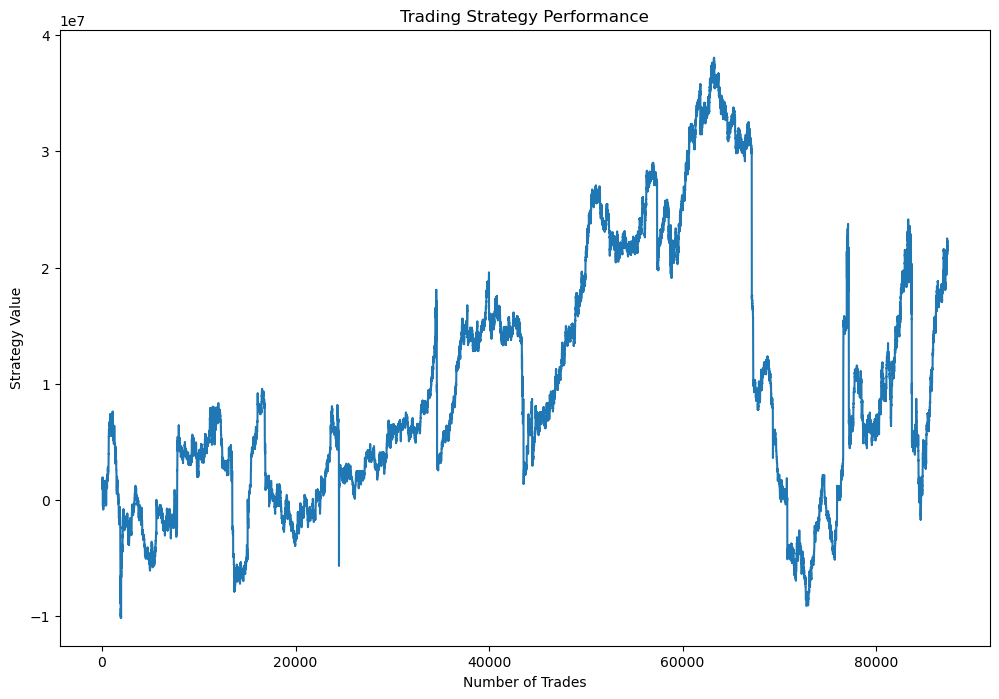

In [4]:
strategy.plot_results(best = True)

Let's see the best strategy in the Test dataset. (without optimization)

In [ ]:
strategy.test()

In [ ]:
strategy.strategy_value[-1]

Now we **optimize** parameters for best indicators.

In [ ]:
strategy.optimize_parameters()

We backtest the best strategy, with optimized parameters.

In [ ]:
strategy.plot_results(best = True)

In [ ]:
strategy.strategy_value[-1]

We try the best indicators and best parameters in the Test dataset.

In [ ]:
strategy.test()

Final Value

In [ ]:
strategy.strategy_value[-1]

#### Trading Strategy vs Passive Strategy

In [ ]:
data = pd.read_csv('data/btc_project_test.csv')

# Turn date into datetime
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Get first and last close data
primer_cierre = data.iloc[0]['Close']
ultimo_cierre = data.iloc[-1]['Close']

# Get asset yeild
rend_pasivo = (ultimo_cierre - primer_cierre) / primer_cierre
print("The passive asset return is: {:.2%}".format(rend_pasivo))

# Compare with used strategy
cash=1000000
cashfinal = 1931055.3570
rend_estrategia = (cashfinal - cash) / cash
print("The trading strategy return is: {:.2%}".format(rend_estrategia))

# Sort data
data = data.sort_values(by='Datetime')

# Rend
data['Returns'] = data['Close'].pct_change().fillna(0)

# See the value passive
initial_investment = cash
data['Investment_Value'] = (1 + data['Returns']).cumprod() * initial_investment

# Graficar el rendimiento de la inversión
plt.figure(figsize=(12, 8))
plt.plot(data['Datetime'], data['Investment_Value'], label='Investment Value', color='blue')
plt.title('Passive strategy')
plt.xlabel('Date')
plt.ylabel('Investment Value')
plt.legend()
plt.grid(True)
plt.show()

valor_final = data['Investment_Value'].iloc[-1]
print("The final value of the investment: ${:,.2f}".format(valor_final))

#### Analysis Bitcoin 5 minutes intervals